# LightGBM
### Parameters:
* **abilities**:
    * **cha**
    * **con**
    * **dex**
    * **int**
    * **str**
    * **wis**
* **attributes**
    * **hp**
    * **ac**
    * **perception**
* **saves**
    * **fortitude**
    * **reflex**
    * **will**
* **resources**
    * **focus**

### Prediction: *level*

## Loading data

In [1]:
import numpy as np
import pandas as pd
import sys

import os
import pathlib

sys.path.append("../../..")
from training.creating_dataset import load_and_preprocess_data

current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path).parent.parent.parent / "pathfinder_2e_data"
DATASET_FILES = [
    "abomination-vaults-bestiary.db",
    "age-of-ashes-bestiary.db",
    "agents-of-edgewatch-bestiary.db",
    "april-fools-bestiary.db",
    "blog-bestiary.db",
    "blood-lords-bestiary.db",
    "book-of-the-dead-bestiary.db",
    "crown-of-the-kobold-king-bestiary.db",
    "extinction-curse-bestiary.db",
    "fall-of-plaguestone.db",
    "fists-of-the-ruby-phoenix-bestiary.db",
    "gatewalkers-bestiary.db",
    "impossible-lands-bestiary.db",
    "kingmaker-bestiary.db",
    "malevolence-bestiary.db",
    "menace-under-otari-bestiary.db",
    "monsters-of-myth-bestiary.db",
    "mwangi-expanse-bestiary.db",
    "night-of-the-gray-death-bestiary.db",
    "npc-gallery.db",
    "one-shot-bestiary.db",
    "outlaws-of-alkenstar-bestiary.db",
    "pathfinder-bestiary-2.db",
    "pathfinder-bestiary-3.db",
    "pathfinder-bestiary.db",
    "pathfinder-dark-archive.db",
    "pfs-introductions-bestiary.db",
    "pfs-season-1-bestiary.db",
    "pfs-season-2-bestiary.db",
    "pfs-season-3-bestiary.db",
    "pfs-season-4-bestiary.db",
    "quest-for-the-frozen-flame-bestiary.db",
    "shadows-at-sundown-bestiary.db",
    "strength-of-thousands-bestiary.db",
    "the-slithering-bestiary.db",
    "travel-guide-bestiary.db",
    "troubles-in-otari-bestiary.db",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
features = [
    "cha",
    "con",
    "dex",
    "int",
    "str",
    "wis",
    "ac",
    "hp",
    "perception",
    "fortitude",
    "reflex",
    "will",
    "focus",
]

df = load_and_preprocess_data(
    DATASET_PATHS,
    characteristics=features,
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3690 entries, 0 to 4327
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dex         3690 non-null   float64
 1   level       3690 non-null   int64  
 2   wis         3690 non-null   float64
 3   focus       3690 non-null   int32  
 4   book        3690 non-null   object 
 5   str         3690 non-null   float64
 6   con         3690 non-null   float64
 7   cha         3690 non-null   float64
 8   int         3690 non-null   float64
 9   reflex      3690 non-null   float64
 10  fortitude   3690 non-null   float64
 11  will        3690 non-null   float64
 12  hp          3690 non-null   int32  
 13  perception  3690 non-null   float64
 14  ac          3690 non-null   float64
dtypes: float64(11), int32(2), int64(1), object(1)
memory usage: 432.4+ KB


In [3]:
df.head()

,dex,level,wis,focus,book,str,con,cha,int,reflex,fortitude,will,hp,perception,ac
0,3.0,9,3.0,1,Pathfinder #165: Eyes of Empty Death,6.0,0.0,0.0,0.0,18.0,15.0,20.0,155,18.0,28.0
1,3.0,10,3.0,0,Pathfinder Abomination Vaults Hardcover Compil...,7.0,6.0,0.0,0.0,17.0,22.0,19.0,175,19.0,30.0
2,3.0,2,3.0,0,Pathfinder #164: Hands of the Devil,4.0,1.0,1.0,-2.0,11.0,7.0,9.0,38,7.0,17.0
3,4.0,8,3.0,0,Pathfinder #164: Hands of the Devil,3.0,3.0,1.0,0.0,16.0,17.0,15.0,140,16.0,27.0
4,6.0,9,4.0,0,Pathfinder #165: Eyes of Empty Death,-5.0,0.0,2.0,2.0,21.0,14.0,18.0,90,20.0,31.0


###### Level

In [4]:
y = df["level"]
y

0        9
1       10
2        2
3        8
4        9
        ..
4322     2
4324     3
4325     4
4326     2
4327     2
Name: level, Length: 3690, dtype: int64

In [5]:
from collections import defaultdict


lvl_stat = defaultdict(lambda: 0)

for lvl in y:
    lvl_stat[lvl] += 1

In [6]:
level_count = pd.DataFrame(
    data={
        "lvl": [key for key in sorted(lvl_stat.keys())],
        "count": [lvl_stat.get(key) for key in sorted(lvl_stat.keys())],
    }
)
level_count

,lvl,count
0,-1,147
1,0,87
2,1,320
3,2,335
4,3,339
5,4,274
6,5,268
7,6,220
8,7,215
9,8,188


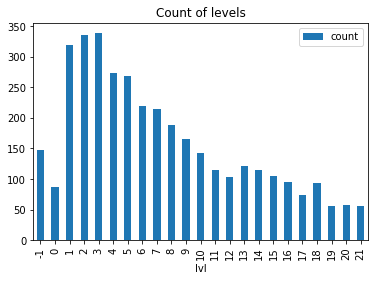

In [7]:
import matplotlib.pyplot as plt


level_count.plot.bar(x="lvl", y="count", title="Count of levels")
plt.show()

## Train test split

### Chronological split

In [8]:
from training.splitting_dataset import split_dataframe


os.chdir("../../../training")
X_train, X_test, y_train, y_test = split_dataframe(df, test_size=0.31)
os.chdir("../notebooks/models/lightgbm")

In [9]:
X_train = X_train.drop(columns=["book"])
X_test = X_test.drop(columns=["book"])

### Random split

In [10]:
(
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
) = split_dataframe(df, chronological_split=False)

In [11]:
X_train_random_split = X_train_random_split.drop(columns=["book"])
X_test_random_split = X_test_random_split.drop(columns=["book"])

## LightGBM

## Chronological split

In [12]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 1626, number of used features: 13
[LightGBM] [Info] Start training from score 7.212177
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.377336	valid_0's l1: 0.376859


In [13]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.61
MAE: 0.38


In [15]:
results = pd.DataFrame(
    data={
        "Split type": [],
        "Tuning type": [],
        "Set of features": [],
        "RMSE": [],
        "MAE": [],
    }
)

results.loc[0] = ["chronological", "default", "expanded", rmse, mae]

In [16]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 0.22
RMSE test: 0.61


###### MAE by level

In [17]:
from training.results import plot_mae_by_level

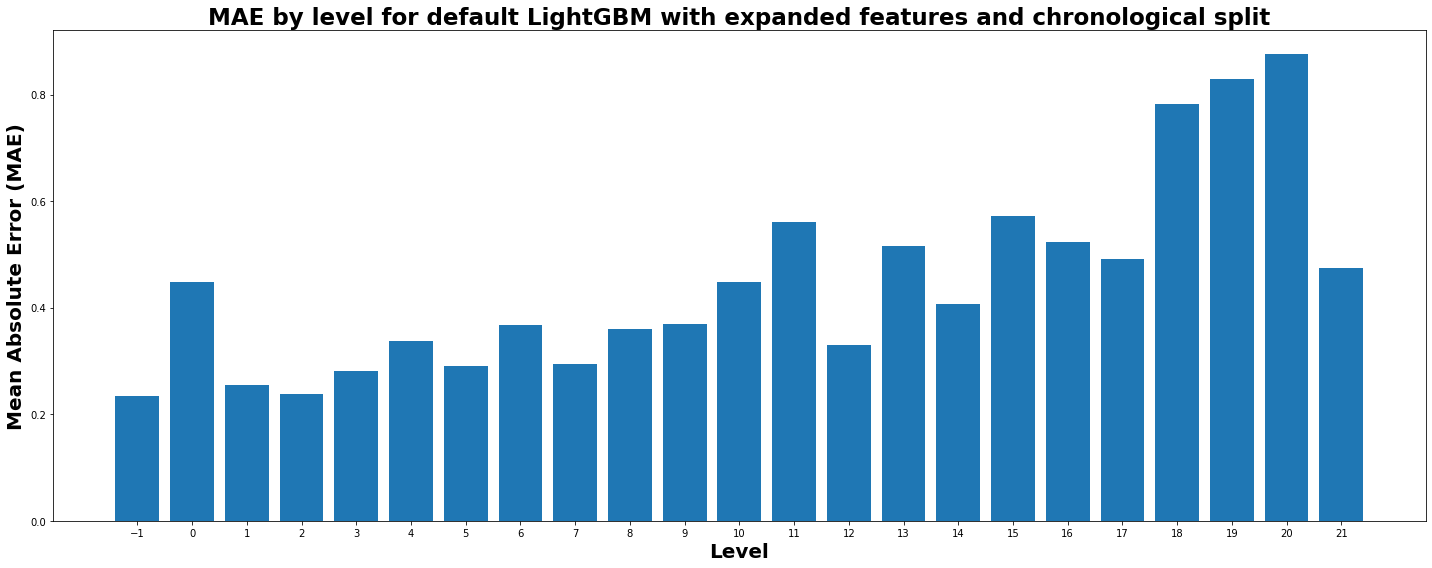

In [18]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for default LightGBM with expanded features and chronological split",
)

In [19]:
from training.results import evaluate_round_predictions, plot_confusion_matrix


evaluate_round_predictions([0.5, 0.33, 0.45], y_test, y_pred_test)

Default:
RMSE: 0.61

Round type: 0.5
RMSE: 0.66

Round type: 0.33
RMSE: 0.66

Round type: 0.45
RMSE: 0.65



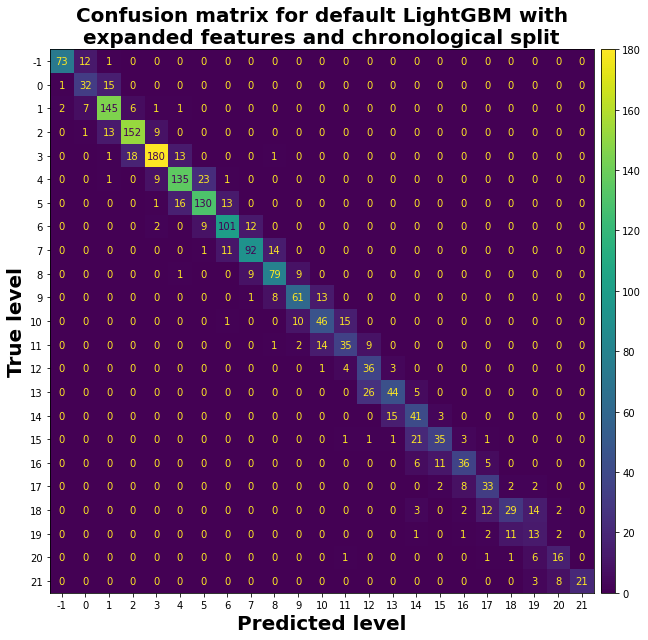

In [20]:
plot_confusion_matrix(
    y_pred_test,
    y_test,
    title="Confusion matrix for default LightGBM with\nexpanded features and chronological split",
)

#### Tuning

In [21]:
from training.results import assess_regression_model

In [22]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-12-01 17:40:27,867] A new study created in memory with name: no-name-75291a98-515c-4b26-9d42-4a741ac00d2f
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.200193 + 0.114961
[200]	cv_agg's l2: 0.197821 + 0.110609
[300]	cv_agg's l2: 0.19891 + 0.108975


feature_fraction, val_score: 0.197440:  14%|######4                                      | 1/7 [00:02<00:16,  2.70s/it]

Early stopping, best iteration is:
[231]	cv_agg's l2: 0.19744 + 0.110023
[100]	cv_agg's l2: 0.210269 + 0.126788
[200]	cv_agg's l2: 0.205478 + 0.124821
[300]	cv_agg's l2: 0.206353 + 0.123095


feature_fraction, val_score: 0.197440:  29%|############8                                | 2/7 [00:05<00:14,  2.81s/it]

Early stopping, best iteration is:
[231]	cv_agg's l2: 0.19744 + 0.110023
[100]	cv_agg's l2: 0.217113 + 0.136915
[200]	cv_agg's l2: 0.213349 + 0.1315
[300]	cv_agg's l2: 0.214563 + 0.129399


feature_fraction, val_score: 0.197440:  43%|###################2                         | 3/7 [00:08<00:11,  2.87s/it]

Early stopping, best iteration is:
[231]	cv_agg's l2: 0.19744 + 0.110023
[100]	cv_agg's l2: 0.204769 + 0.121922
[200]	cv_agg's l2: 0.203037 + 0.11943
[300]	cv_agg's l2: 0.205241 + 0.120101


feature_fraction, val_score: 0.197440:  57%|#########################7                   | 4/7 [00:11<00:08,  2.90s/it]

Early stopping, best iteration is:
[231]	cv_agg's l2: 0.19744 + 0.110023
[100]	cv_agg's l2: 0.198582 + 0.105164
[200]	cv_agg's l2: 0.197054 + 0.102933


feature_fraction, val_score: 0.195872:  71%|################################1            | 5/7 [00:13<00:05,  2.61s/it]

Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667
[100]	cv_agg's l2: 0.201444 + 0.1076
[200]	cv_agg's l2: 0.199618 + 0.10595


feature_fraction, val_score: 0.195872:  86%|######################################5      | 6/7 [00:16<00:02,  2.57s/it]

Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667
[100]	cv_agg's l2: 0.198911 + 0.0995399
[200]	cv_agg's l2: 0.197882 + 0.0985643


feature_fraction, val_score: 0.195872: 100%|#############################################| 7/7 [00:18<00:00,  2.64s/it]


Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667


num_leaves, val_score: 0.195872:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503


num_leaves, val_score: 0.195872:   5%|##5                                               | 1/20 [00:03<01:04,  3.37s/it]

Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503


num_leaves, val_score: 0.195872:  10%|#####                                             | 2/20 [00:06<00:59,  3.32s/it]

Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503


num_leaves, val_score: 0.195872:  15%|#######5                                          | 3/20 [00:09<00:54,  3.20s/it]

Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667
[100]	cv_agg's l2: 0.198171 + 0.102843
[200]	cv_agg's l2: 0.196526 + 0.101055


num_leaves, val_score: 0.195872:  20%|##########                                        | 4/20 [00:11<00:44,  2.75s/it]

Early stopping, best iteration is:
[155]	cv_agg's l2: 0.195872 + 0.103667
[100]	cv_agg's l2: 0.199429 + 0.105797
[200]	cv_agg's l2: 0.193325 + 0.104388
[300]	cv_agg's l2: 0.192949 + 0.104013


num_leaves, val_score: 0.192571:  25%|############5                                     | 5/20 [00:13<00:36,  2.46s/it]

[400]	cv_agg's l2: 0.193753 + 0.105189
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.209201 + 0.109815
[200]	cv_agg's l2: 0.199427 + 0.105261
[300]	cv_agg's l2: 0.195009 + 0.104372


num_leaves, val_score: 0.192571:  30%|###############                                   | 6/20 [00:14<00:28,  2.03s/it]

[400]	cv_agg's l2: 0.193133 + 0.104874
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.290494 + 0.128121
[200]	cv_agg's l2: 0.25771 + 0.124848
[300]	cv_agg's l2: 0.243788 + 0.121085


num_leaves, val_score: 0.192571:  35%|#################5                                | 7/20 [00:15<00:20,  1.58s/it]

[400]	cv_agg's l2: 0.233311 + 0.116968
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503
[300]	cv_agg's l2: 0.203079 + 0.0969536


num_leaves, val_score: 0.192571:  40%|####################                              | 8/20 [00:20<00:32,  2.74s/it]

[400]	cv_agg's l2: 0.205923 + 0.0967644
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503
[300]	cv_agg's l2: 0.203079 + 0.0969536


num_leaves, val_score: 0.192571:  45%|######################5                           | 9/20 [00:26<00:39,  3.63s/it]

[400]	cv_agg's l2: 0.205923 + 0.0967644
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.209201 + 0.109815
[200]	cv_agg's l2: 0.199427 + 0.105261
[300]	cv_agg's l2: 0.195009 + 0.104372


num_leaves, val_score: 0.192571:  50%|########################5                        | 10/20 [00:27<00:29,  2.95s/it]

[400]	cv_agg's l2: 0.193133 + 0.104874
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503
[300]	cv_agg's l2: 0.203079 + 0.0969536


num_leaves, val_score: 0.192571:  55%|##########################9                      | 11/20 [00:33<00:34,  3.78s/it]

[400]	cv_agg's l2: 0.205923 + 0.0967644
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503
[300]	cv_agg's l2: 0.203079 + 0.0969536


num_leaves, val_score: 0.192571:  60%|#############################4                   | 12/20 [00:38<00:34,  4.26s/it]

[400]	cv_agg's l2: 0.205923 + 0.0967644
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503
[300]	cv_agg's l2: 0.203079 + 0.0969536


num_leaves, val_score: 0.192571:  65%|###############################8                 | 13/20 [00:44<00:32,  4.61s/it]

[400]	cv_agg's l2: 0.205923 + 0.0967644
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.198597 + 0.0954729
[200]	cv_agg's l2: 0.197202 + 0.0921077
[300]	cv_agg's l2: 0.198694 + 0.0919418


num_leaves, val_score: 0.192571:  70%|##################################3              | 14/20 [00:49<00:28,  4.73s/it]

[400]	cv_agg's l2: 0.201279 + 0.0915523
Early stopping, best iteration is:
[312]	cv_agg's l2: 0.192571 + 0.103894
[100]	cv_agg's l2: 0.220975 + 0.0986314
[200]	cv_agg's l2: 0.203419 + 0.0934511
[300]	cv_agg's l2: 0.194096 + 0.0925894
[400]	cv_agg's l2: 0.191656 + 0.0933552
[500]	cv_agg's l2: 0.190721 + 0.0938288


num_leaves, val_score: 0.190369:  75%|####################################7            | 15/20 [00:50<00:18,  3.75s/it]

[600]	cv_agg's l2: 0.191116 + 0.0952519
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.195329 + 0.106199
[200]	cv_agg's l2: 0.194819 + 0.103881
[300]	cv_agg's l2: 0.196617 + 0.103918
[400]	cv_agg's l2: 0.199033 + 0.103726
[500]	cv_agg's l2: 0.201293 + 0.103483


num_leaves, val_score: 0.190369:  80%|#######################################2         | 16/20 [00:56<00:17,  4.25s/it]

[600]	cv_agg's l2: 0.202928 + 0.10326
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.209201 + 0.109815
[200]	cv_agg's l2: 0.199427 + 0.105261
[300]	cv_agg's l2: 0.195009 + 0.104372
[400]	cv_agg's l2: 0.193133 + 0.104874
[500]	cv_agg's l2: 0.193047 + 0.104513


num_leaves, val_score: 0.190369:  85%|#########################################6       | 17/20 [00:57<00:10,  3.51s/it]

[600]	cv_agg's l2: 0.19242 + 0.104579
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.199424 + 0.0994668
[200]	cv_agg's l2: 0.200352 + 0.0973503
[300]	cv_agg's l2: 0.203079 + 0.0969536
[400]	cv_agg's l2: 0.205923 + 0.0967644
[500]	cv_agg's l2: 0.207954 + 0.0961177


num_leaves, val_score: 0.190369:  90%|############################################1    | 18/20 [01:06<00:10,  5.00s/it]

[600]	cv_agg's l2: 0.209664 + 0.0958815
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.197708 + 0.100801
[200]	cv_agg's l2: 0.198334 + 0.0980062
[300]	cv_agg's l2: 0.200544 + 0.0974049
[400]	cv_agg's l2: 0.203903 + 0.0975481
[500]	cv_agg's l2: 0.20596 + 0.0969887


num_leaves, val_score: 0.190369:  95%|##############################################5  | 19/20 [01:12<00:05,  5.36s/it]

[600]	cv_agg's l2: 0.207646 + 0.0970422
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.266324 + 0.124188
[200]	cv_agg's l2: 0.238355 + 0.117753
[300]	cv_agg's l2: 0.226671 + 0.112742
[400]	cv_agg's l2: 0.221117 + 0.113264
[500]	cv_agg's l2: 0.217521 + 0.112133


num_leaves, val_score: 0.190369: 100%|#################################################| 20/20 [01:13<00:00,  3.69s/it]


[600]	cv_agg's l2: 0.214813 + 0.111312
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387


bagging, val_score: 0.190369:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.229626 + 0.107533
[200]	cv_agg's l2: 0.212188 + 0.102194
[300]	cv_agg's l2: 0.203862 + 0.0990262
[400]	cv_agg's l2: 0.201316 + 0.0967623
[500]	cv_agg's l2: 0.199283 + 0.0953852


bagging, val_score: 0.190369:  10%|#####3                                               | 1/10 [00:01<00:14,  1.59s/it]

[600]	cv_agg's l2: 0.19677 + 0.0920871
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.233366 + 0.120748
[200]	cv_agg's l2: 0.209439 + 0.112186
[300]	cv_agg's l2: 0.201452 + 0.111947
[400]	cv_agg's l2: 0.198592 + 0.110968
[500]	cv_agg's l2: 0.196237 + 0.110757


bagging, val_score: 0.190369:  20%|##########6                                          | 2/10 [00:03<00:12,  1.58s/it]

[600]	cv_agg's l2: 0.195281 + 0.111503
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.238127 + 0.130434
[200]	cv_agg's l2: 0.219582 + 0.122361
[300]	cv_agg's l2: 0.214437 + 0.113847
[400]	cv_agg's l2: 0.210089 + 0.110329
[500]	cv_agg's l2: 0.210565 + 0.110514


bagging, val_score: 0.190369:  30%|###############9                                     | 3/10 [00:04<00:10,  1.53s/it]

[600]	cv_agg's l2: 0.209222 + 0.112401
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.226679 + 0.107604
[200]	cv_agg's l2: 0.206774 + 0.103787
[300]	cv_agg's l2: 0.19821 + 0.10277
[400]	cv_agg's l2: 0.19681 + 0.10188
[500]	cv_agg's l2: 0.19499 + 0.103608


bagging, val_score: 0.190369:  40%|#####################2                               | 4/10 [00:06<00:10,  1.68s/it]

[600]	cv_agg's l2: 0.194424 + 0.103413
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.220556 + 0.11385
[200]	cv_agg's l2: 0.205016 + 0.10792
[300]	cv_agg's l2: 0.197405 + 0.102615
[400]	cv_agg's l2: 0.194731 + 0.102848
[500]	cv_agg's l2: 0.192627 + 0.100975


bagging, val_score: 0.190369:  50%|##########################5                          | 5/10 [00:08<00:08,  1.67s/it]

[600]	cv_agg's l2: 0.192212 + 0.0995257
Early stopping, best iteration is:
[508]	cv_agg's l2: 0.190369 + 0.0939387
[100]	cv_agg's l2: 0.218738 + 0.112874
[200]	cv_agg's l2: 0.201776 + 0.103639
[300]	cv_agg's l2: 0.19504 + 0.0976493
[400]	cv_agg's l2: 0.190598 + 0.097775
[500]	cv_agg's l2: 0.188157 + 0.0960584
[600]	cv_agg's l2: 0.18792 + 0.0943525


bagging, val_score: 0.187483:  60%|###############################8                     | 6/10 [00:10<00:07,  1.76s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.221841 + 0.115985
[200]	cv_agg's l2: 0.204235 + 0.106905
[300]	cv_agg's l2: 0.197349 + 0.103549
[400]	cv_agg's l2: 0.194262 + 0.103381
[500]	cv_agg's l2: 0.192894 + 0.101014
[600]	cv_agg's l2: 0.194076 + 0.101587


bagging, val_score: 0.187483:  70%|#####################################                | 7/10 [00:11<00:05,  1.79s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.217873 + 0.121916
[200]	cv_agg's l2: 0.200076 + 0.108938
[300]	cv_agg's l2: 0.195154 + 0.105979
[400]	cv_agg's l2: 0.19288 + 0.104694
[500]	cv_agg's l2: 0.191565 + 0.102258
[600]	cv_agg's l2: 0.19111 + 0.101048


bagging, val_score: 0.187483:  80%|##########################################4          | 8/10 [00:13<00:03,  1.79s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.221551 + 0.115739
[200]	cv_agg's l2: 0.202162 + 0.103018
[300]	cv_agg's l2: 0.193912 + 0.0992543
[400]	cv_agg's l2: 0.192482 + 0.0980382
[500]	cv_agg's l2: 0.190846 + 0.0956115
[600]	cv_agg's l2: 0.190807 + 0.0941766


bagging, val_score: 0.187483:  90%|###############################################7     | 9/10 [00:15<00:01,  1.80s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.231371 + 0.126297
[200]	cv_agg's l2: 0.212725 + 0.116124
[300]	cv_agg's l2: 0.205205 + 0.111098
[400]	cv_agg's l2: 0.202699 + 0.109372
[500]	cv_agg's l2: 0.200356 + 0.10693
[600]	cv_agg's l2: 0.198761 + 0.105188


bagging, val_score: 0.187483: 100%|####################################################| 10/10 [00:17<00:00,  1.75s/it]


Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829


feature_fraction_stage2, val_score: 0.187483:   0%|                                              | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.218738 + 0.112874
[200]	cv_agg's l2: 0.201776 + 0.103639
[300]	cv_agg's l2: 0.19504 + 0.0976493
[400]	cv_agg's l2: 0.190598 + 0.097775
[500]	cv_agg's l2: 0.188157 + 0.0960584
[600]	cv_agg's l2: 0.18792 + 0.0943525


feature_fraction_stage2, val_score: 0.187483:  17%|######3                               | 1/6 [00:01<00:09,  1.90s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.224227 + 0.111486
[200]	cv_agg's l2: 0.207784 + 0.110986
[300]	cv_agg's l2: 0.19862 + 0.106548
[400]	cv_agg's l2: 0.196089 + 0.106572
[500]	cv_agg's l2: 0.193515 + 0.104078
[600]	cv_agg's l2: 0.192305 + 0.1007


feature_fraction_stage2, val_score: 0.187483:  33%|############6                         | 2/6 [00:03<00:07,  1.83s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.218738 + 0.112874
[200]	cv_agg's l2: 0.201776 + 0.103639
[300]	cv_agg's l2: 0.19504 + 0.0976493
[400]	cv_agg's l2: 0.190598 + 0.097775
[500]	cv_agg's l2: 0.188157 + 0.0960584
[600]	cv_agg's l2: 0.18792 + 0.0943525


feature_fraction_stage2, val_score: 0.187483:  50%|###################                   | 3/6 [00:05<00:05,  1.90s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.221283 + 0.117774
[200]	cv_agg's l2: 0.203941 + 0.106966
[300]	cv_agg's l2: 0.196798 + 0.102103
[400]	cv_agg's l2: 0.193571 + 0.101203
[500]	cv_agg's l2: 0.191858 + 0.0992796
[600]	cv_agg's l2: 0.192613 + 0.0976942


feature_fraction_stage2, val_score: 0.187483:  67%|#########################3            | 4/6 [00:07<00:03,  1.87s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.218738 + 0.112874
[200]	cv_agg's l2: 0.201776 + 0.103639
[300]	cv_agg's l2: 0.19504 + 0.0976493
[400]	cv_agg's l2: 0.190598 + 0.097775
[500]	cv_agg's l2: 0.188157 + 0.0960584


feature_fraction_stage2, val_score: 0.187483:  83%|###############################6      | 5/6 [00:11<00:02,  2.57s/it]

[600]	cv_agg's l2: 0.18792 + 0.0943525
Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.224227 + 0.111486
[200]	cv_agg's l2: 0.207784 + 0.110986
[300]	cv_agg's l2: 0.19862 + 0.106548
[400]	cv_agg's l2: 0.196089 + 0.106572
[500]	cv_agg's l2: 0.193515 + 0.104078
[600]	cv_agg's l2: 0.192305 + 0.1007


feature_fraction_stage2, val_score: 0.187483: 100%|######################################| 6/6 [00:12<00:00,  2.12s/it]


Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829


regularization_factors, val_score: 0.187483:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.219384 + 0.11167
[200]	cv_agg's l2: 0.202844 + 0.103033
[300]	cv_agg's l2: 0.194953 + 0.097105
[400]	cv_agg's l2: 0.191949 + 0.0983702
[500]	cv_agg's l2: 0.19007 + 0.0963342
[600]	cv_agg's l2: 0.189189 + 0.0948762


regularization_factors, val_score: 0.187483:   5%|#9                                    | 1/20 [00:01<00:24,  1.28s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.187483 + 0.0943829
[100]	cv_agg's l2: 0.219784 + 0.115561
[200]	cv_agg's l2: 0.199975 + 0.104999
[300]	cv_agg's l2: 0.192583 + 0.0979517
[400]	cv_agg's l2: 0.188915 + 0.0972693


regularization_factors, val_score: 0.185365:  10%|###8                                  | 2/20 [00:02<00:21,  1.20s/it]

[500]	cv_agg's l2: 0.18553 + 0.0955089
[600]	cv_agg's l2: 0.186528 + 0.0945606
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.246627 + 0.119378
[200]	cv_agg's l2: 0.229247 + 0.113004
[300]	cv_agg's l2: 0.222207 + 0.111008
[400]	cv_agg's l2: 0.219843 + 0.111226


regularization_factors, val_score: 0.185365:  15%|#####7                                | 3/20 [00:03<00:19,  1.15s/it]

[500]	cv_agg's l2: 0.218444 + 0.111917
[600]	cv_agg's l2: 0.217657 + 0.112409
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.225824 + 0.123419
[200]	cv_agg's l2: 0.207595 + 0.111671
[300]	cv_agg's l2: 0.199857 + 0.108078
[400]	cv_agg's l2: 0.198084 + 0.107088


regularization_factors, val_score: 0.185365:  15%|#####7                                | 3/20 [00:04<00:19,  1.15s/it]

[500]	cv_agg's l2: 0.195801 + 0.105642
[600]	cv_agg's l2: 0.196372 + 0.105
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508


regularization_factors, val_score: 0.185365:  20%|#######6                              | 4/20 [00:04<00:18,  1.13s/it]

[100]	cv_agg's l2: 0.218739 + 0.112875
[200]	cv_agg's l2: 0.201777 + 0.10364
[300]	cv_agg's l2: 0.195166 + 0.096942
[400]	cv_agg's l2: 0.191177 + 0.0983269
[500]	cv_agg's l2: 0.188476 + 0.0963219


regularization_factors, val_score: 0.185365:  25%|#########5                            | 5/20 [00:06<00:19,  1.33s/it]

[600]	cv_agg's l2: 0.189086 + 0.0961491
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.219982 + 0.113441
[200]	cv_agg's l2: 0.202902 + 0.103959
[300]	cv_agg's l2: 0.192896 + 0.0961015
[400]	cv_agg's l2: 0.190278 + 0.0967494
[500]	cv_agg's l2: 0.187584 + 0.0946657


regularization_factors, val_score: 0.185365:  30%|###########4                          | 6/20 [00:07<00:19,  1.41s/it]

[600]	cv_agg's l2: 0.187096 + 0.0943307
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.217218 + 0.11374
[200]	cv_agg's l2: 0.202211 + 0.104918
[300]	cv_agg's l2: 0.195499 + 0.0998396
[400]	cv_agg's l2: 0.193252 + 0.0989995
[500]	cv_agg's l2: 0.191713 + 0.0964963


regularization_factors, val_score: 0.185365:  35%|#############3                        | 7/20 [00:09<00:19,  1.50s/it]

[600]	cv_agg's l2: 0.191657 + 0.0953878
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.219699 + 0.113553
[200]	cv_agg's l2: 0.202103 + 0.103038
[300]	cv_agg's l2: 0.193398 + 0.0982754
[400]	cv_agg's l2: 0.190279 + 0.0969884
[500]	cv_agg's l2: 0.187891 + 0.0955321


regularization_factors, val_score: 0.185365:  40%|###############2                      | 8/20 [00:11<00:19,  1.60s/it]

[600]	cv_agg's l2: 0.189364 + 0.0937931
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.218602 + 0.112746
[200]	cv_agg's l2: 0.201843 + 0.105544
[300]	cv_agg's l2: 0.194447 + 0.0980066
[400]	cv_agg's l2: 0.189789 + 0.098404
[500]	cv_agg's l2: 0.187732 + 0.0965467


regularization_factors, val_score: 0.185365:  45%|#################1                    | 9/20 [00:12<00:17,  1.58s/it]

[600]	cv_agg's l2: 0.18737 + 0.0953953
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.261729 + 0.119132
[200]	cv_agg's l2: 0.242153 + 0.111717
[300]	cv_agg's l2: 0.235176 + 0.10925
[400]	cv_agg's l2: 0.231561 + 0.110148
[500]	cv_agg's l2: 0.22943 + 0.108727


regularization_factors, val_score: 0.185365:  50%|##################5                  | 10/20 [00:14<00:15,  1.50s/it]

[600]	cv_agg's l2: 0.228414 + 0.109701
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.218738 + 0.112874
[200]	cv_agg's l2: 0.201776 + 0.103639
[300]	cv_agg's l2: 0.19504 + 0.0976493
[400]	cv_agg's l2: 0.190598 + 0.097775
[500]	cv_agg's l2: 0.188157 + 0.0960584


regularization_factors, val_score: 0.185365:  55%|####################3                | 11/20 [00:15<00:13,  1.50s/it]

[600]	cv_agg's l2: 0.18792 + 0.0943525
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.219062 + 0.114102
[200]	cv_agg's l2: 0.202087 + 0.104779
[300]	cv_agg's l2: 0.193152 + 0.099286
[400]	cv_agg's l2: 0.19054 + 0.0986296
[500]	cv_agg's l2: 0.188832 + 0.0978523


regularization_factors, val_score: 0.185365:  60%|######################2              | 12/20 [00:17<00:13,  1.64s/it]

[600]	cv_agg's l2: 0.187497 + 0.0951598
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.218966 + 0.112436
[200]	cv_agg's l2: 0.20175 + 0.102607
[300]	cv_agg's l2: 0.192762 + 0.0975321
[400]	cv_agg's l2: 0.1901 + 0.0974641
[500]	cv_agg's l2: 0.186719 + 0.0953116


regularization_factors, val_score: 0.185365:  65%|########################             | 13/20 [00:19<00:11,  1.62s/it]

[600]	cv_agg's l2: 0.18736 + 0.0947042
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.216689 + 0.111559
[200]	cv_agg's l2: 0.199954 + 0.102726
[300]	cv_agg's l2: 0.191111 + 0.0954951
[400]	cv_agg's l2: 0.18889 + 0.0965291
[500]	cv_agg's l2: 0.186256 + 0.095321


regularization_factors, val_score: 0.185365:  70%|#########################9           | 14/20 [00:20<00:09,  1.62s/it]

[600]	cv_agg's l2: 0.186896 + 0.0940645
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.217151 + 0.113038
[200]	cv_agg's l2: 0.19999 + 0.102268
[300]	cv_agg's l2: 0.194247 + 0.0975604
[400]	cv_agg's l2: 0.190334 + 0.0963216
[500]	cv_agg's l2: 0.188008 + 0.0948529


regularization_factors, val_score: 0.185365:  75%|###########################7         | 15/20 [00:22<00:08,  1.67s/it]

[600]	cv_agg's l2: 0.186872 + 0.0939984
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.217024 + 0.112794
[200]	cv_agg's l2: 0.199782 + 0.103306
[300]	cv_agg's l2: 0.192263 + 0.0958961
[400]	cv_agg's l2: 0.189215 + 0.0963217
[500]	cv_agg's l2: 0.188295 + 0.0944832


regularization_factors, val_score: 0.185365:  80%|#############################6       | 16/20 [00:24<00:06,  1.64s/it]

[600]	cv_agg's l2: 0.188968 + 0.0938483
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.218765 + 0.116069
[200]	cv_agg's l2: 0.202106 + 0.106503
[300]	cv_agg's l2: 0.194284 + 0.100357
[400]	cv_agg's l2: 0.191032 + 0.100237
[500]	cv_agg's l2: 0.189041 + 0.0980136


regularization_factors, val_score: 0.185365:  85%|###############################4     | 17/20 [00:26<00:05,  1.71s/it]

[600]	cv_agg's l2: 0.189586 + 0.0978926
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.220892 + 0.118475
[200]	cv_agg's l2: 0.202778 + 0.10621
[300]	cv_agg's l2: 0.193185 + 0.10055
[400]	cv_agg's l2: 0.190409 + 0.09842
[500]	cv_agg's l2: 0.187138 + 0.0958584


regularization_factors, val_score: 0.185365:  90%|#################################3   | 18/20 [00:27<00:03,  1.67s/it]

[600]	cv_agg's l2: 0.187157 + 0.0953516
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.219902 + 0.115713
[200]	cv_agg's l2: 0.202395 + 0.107553
[300]	cv_agg's l2: 0.193718 + 0.101926
[400]	cv_agg's l2: 0.191394 + 0.101296
[500]	cv_agg's l2: 0.188588 + 0.099572


regularization_factors, val_score: 0.185365:  95%|###################################1 | 19/20 [00:29<00:01,  1.67s/it]

[600]	cv_agg's l2: 0.188839 + 0.0991968
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.21928 + 0.114181
[200]	cv_agg's l2: 0.205229 + 0.107463
[300]	cv_agg's l2: 0.19724 + 0.102877
[400]	cv_agg's l2: 0.193564 + 0.101274
[500]	cv_agg's l2: 0.191247 + 0.0983009


regularization_factors, val_score: 0.185365: 100%|#####################################| 20/20 [00:31<00:00,  1.55s/it]


[600]	cv_agg's l2: 0.191 + 0.0978023
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508


min_data_in_leaf, val_score: 0.185365:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.265859 + 0.115043
[200]	cv_agg's l2: 0.250007 + 0.111025
[300]	cv_agg's l2: 0.241788 + 0.110064
[400]	cv_agg's l2: 0.236823 + 0.108434
[500]	cv_agg's l2: 0.233841 + 0.107878


min_data_in_leaf, val_score: 0.185365:  20%|#########                                    | 1/5 [00:02<00:08,  2.12s/it]

[600]	cv_agg's l2: 0.2319 + 0.106024
Early stopping, best iteration is:
[504]	cv_agg's l2: 0.185365 + 0.0953508
[100]	cv_agg's l2: 0.212053 + 0.105943
[200]	cv_agg's l2: 0.193484 + 0.0982902
[300]	cv_agg's l2: 0.186688 + 0.0933871
[400]	cv_agg's l2: 0.185886 + 0.0939526
[500]	cv_agg's l2: 0.184584 + 0.0919455
[600]	cv_agg's l2: 0.183863 + 0.0921192


min_data_in_leaf, val_score: 0.183849:  40%|##################                           | 2/5 [00:04<00:06,  2.21s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.183849 + 0.0915048
[100]	cv_agg's l2: 0.536831 + 0.282879
[200]	cv_agg's l2: 0.484488 + 0.251356
[300]	cv_agg's l2: 0.463627 + 0.234417
[400]	cv_agg's l2: 0.451856 + 0.225404
[500]	cv_agg's l2: 0.443346 + 0.217638
[600]	cv_agg's l2: 0.444176 + 0.223007


min_data_in_leaf, val_score: 0.183849:  60%|###########################                  | 3/5 [00:06<00:04,  2.33s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.183849 + 0.0915048
[100]	cv_agg's l2: 0.220283 + 0.115641
[200]	cv_agg's l2: 0.205166 + 0.106335
[300]	cv_agg's l2: 0.197613 + 0.100921
[400]	cv_agg's l2: 0.195854 + 0.100394
[500]	cv_agg's l2: 0.193422 + 0.0987864
[600]	cv_agg's l2: 0.193706 + 0.0971689


min_data_in_leaf, val_score: 0.183849:  80%|####################################         | 4/5 [00:09<00:02,  2.33s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.183849 + 0.0915048
[100]	cv_agg's l2: 0.214013 + 0.100817
[200]	cv_agg's l2: 0.197186 + 0.0949684
[300]	cv_agg's l2: 0.192388 + 0.0920452
[400]	cv_agg's l2: 0.191358 + 0.094784
[500]	cv_agg's l2: 0.188051 + 0.0927363
[600]	cv_agg's l2: 0.186488 + 0.093522


min_data_in_leaf, val_score: 0.183849: 100%|#############################################| 5/5 [00:11<00:00,  2.28s/it]

Early stopping, best iteration is:
[596]	cv_agg's l2: 0.183849 + 0.0915048


In [23]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.1838492811845342
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 0.2157222343350567
    lambda_l2: 4.073903339846606e-06
    num_leaves: 6
    feature_fraction: 0.6
    bagging_fraction: 0.6768168622990559
    bagging_freq: 4
    min_child_samples: 10


In [24]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [25]:
rmse, mae = assess_regression_model(lgb_tuned, X_train, X_test, y_train, y_test)

RMSE train: 0.04
RMSE test: 0.56
MAE test: 0.36



In [26]:
results.loc[1] = [
    "chronological",
    "Optuna",
    "expanded",
    rmse,
    mae,
]

###### MAE by level

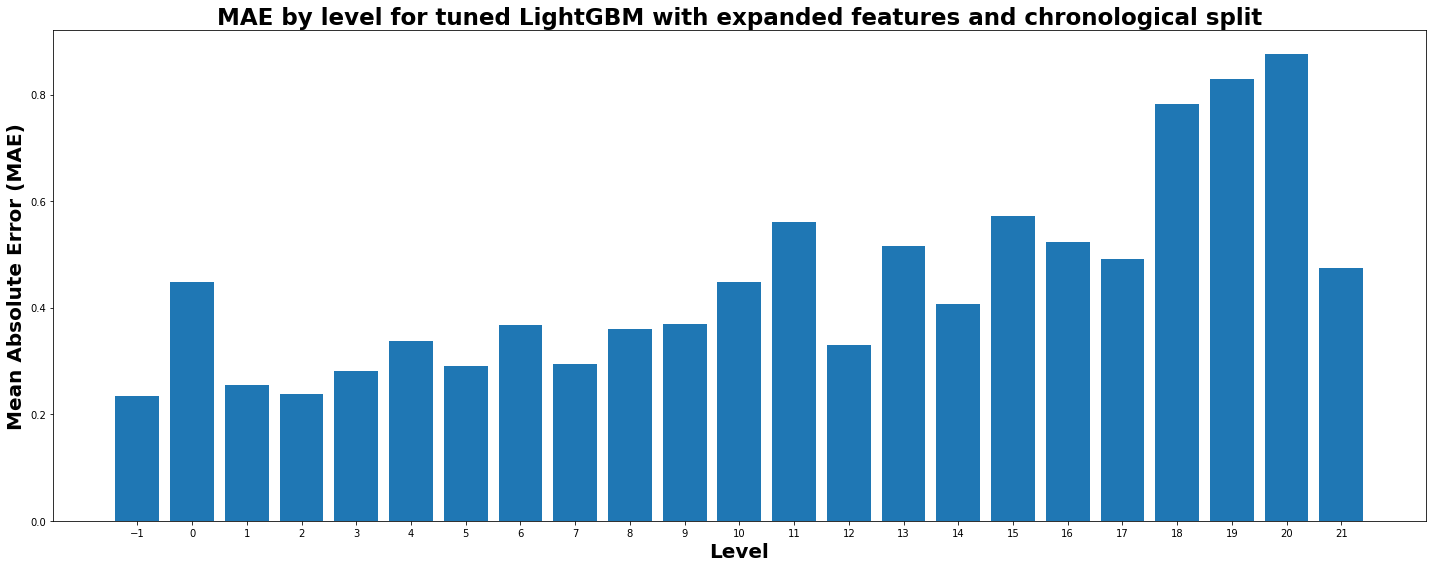

In [27]:
plot_mae_by_level(
    y_test,
    y_pred_test,
    title="MAE by level for tuned LightGBM with expanded features and chronological split",
)

In [30]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.56

Round type: 0.5
RMSE: 0.60

Round type: 0.33
RMSE: 0.63

Round type: 0.45
RMSE: 0.60



In [31]:
predict[predict < -1] = -1
predict[predict > 21] = 21

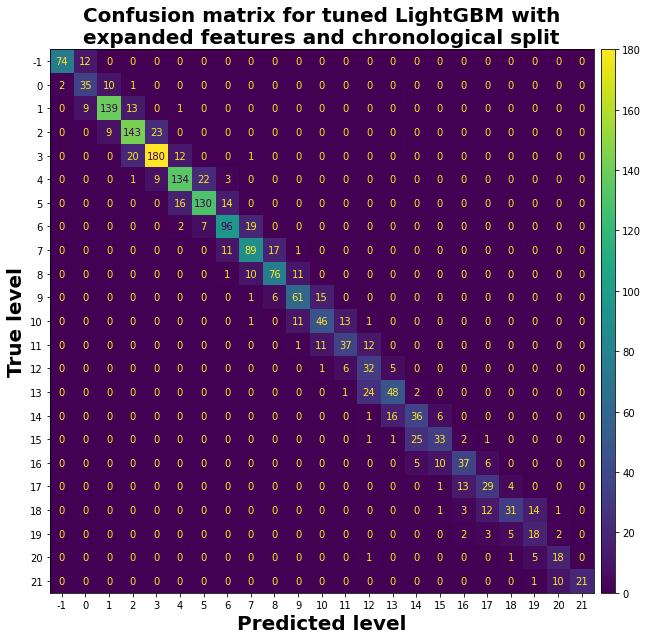

In [32]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nexpanded features and chronological split",
)

## Random split

In [33]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)
lgb_eval = lgb.Dataset(X_test_random_split, y_test_random_split, reference=lgb_train)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": {"l2", "l1"},
}

gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=5)],
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 465
[LightGBM] [Info] Number of data points in the train set: 2767, number of used features: 13
[LightGBM] [Info] Start training from score 7.220455
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 0.17368	valid_0's l1: 0.277924


In [34]:
y_pred_train = gbm.predict(X_train_random_split, num_iteration=gbm.best_iteration)
y_pred_test = gbm.predict(X_test_random_split, num_iteration=gbm.best_iteration)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test_random_split, y_pred_test, squared=False)
mae = mean_absolute_error(y_test_random_split, y_pred_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.42
MAE: 0.28


In [36]:
results.loc[2] = ["random", "default", "expanded", rmse, mae]

###### MAE by level

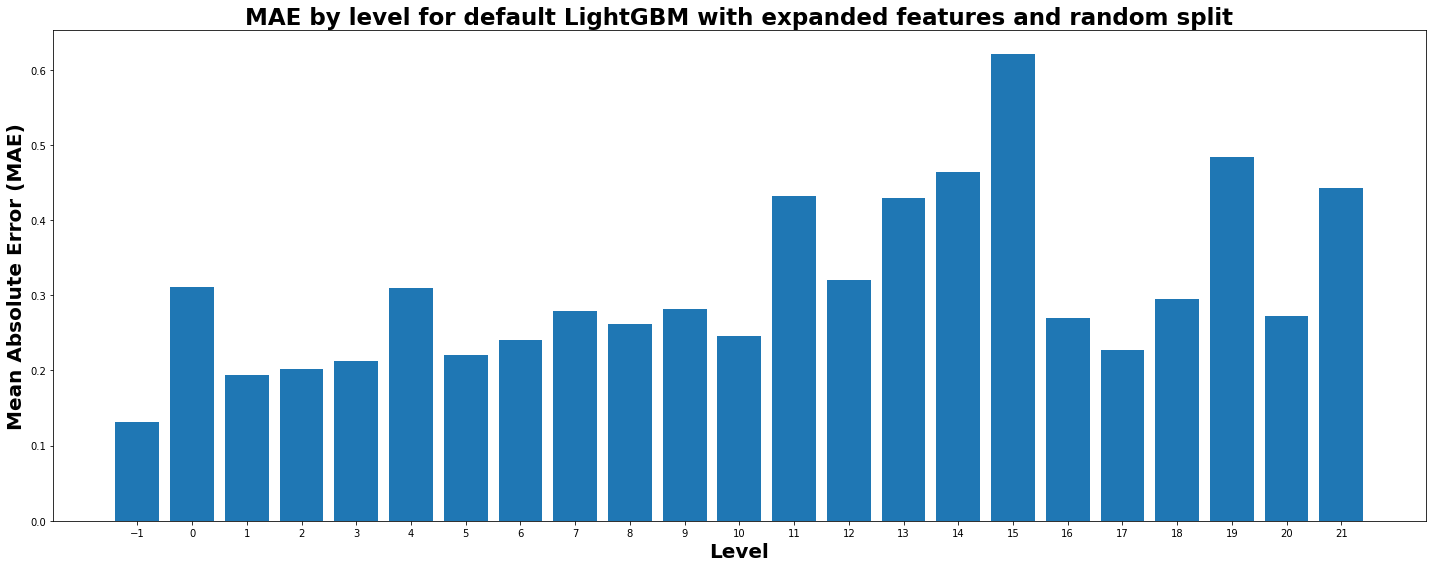

In [37]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for default LightGBM with expanded features and random split",
)

In [38]:
evaluate_round_predictions([0.5, 0.33, 0.45], y_test_random_split, y_pred_test)

Default:
RMSE: 0.42

Round type: 0.5
RMSE: 0.45

Round type: 0.33
RMSE: 0.49

Round type: 0.45
RMSE: 0.46



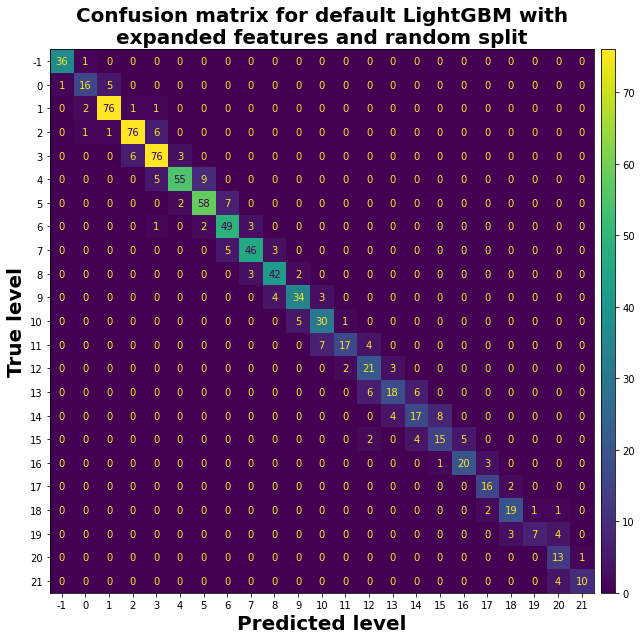

In [39]:
plot_confusion_matrix(
    y_pred_test,
    y_test_random_split,
    title="Confusion matrix for default LightGBM with\nexpanded features and random split",
)

### Tuning

In [40]:
import optuna.integration.lightgbm as lgb
from lightgbm import early_stopping
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


lgb_train = lgb.Dataset(X_train_random_split, y_train_random_split)

params = {
    "boosting_type": "gbdt",
    "objective": "regression",
    "metric": "l2",
    "verbosity": -1,
}

tuner = lgb.LightGBMTunerCV(
    params,
    lgb_train,
    folds=KFold(n_splits=5),
    num_boost_round=10000,
    callbacks=[early_stopping(100), log_evaluation(100)],
)

tuner.run()

[I 2023-12-01 17:48:52,830] A new study created in memory with name: no-name-cb4b676f-5462-4aa2-a28e-45f783113fa8
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	cv_agg's l2: 0.245356 + 0.0497799
[200]	cv_agg's l2: 0.243125 + 0.0502596


feature_fraction, val_score: 0.242656:  14%|######4                                      | 1/7 [00:03<00:18,  3.08s/it]

Early stopping, best iteration is:
[175]	cv_agg's l2: 0.242656 + 0.0502421
[100]	cv_agg's l2: 0.24768 + 0.0596315
[200]	cv_agg's l2: 0.24481 + 0.0587218


feature_fraction, val_score: 0.242656:  29%|############8                                | 2/7 [00:05<00:14,  2.83s/it]

Early stopping, best iteration is:
[175]	cv_agg's l2: 0.242656 + 0.0502421
[100]	cv_agg's l2: 0.251219 + 0.0515911
[200]	cv_agg's l2: 0.247248 + 0.0496118


feature_fraction, val_score: 0.242656:  43%|###################2                         | 3/7 [00:08<00:11,  2.88s/it]

Early stopping, best iteration is:
[175]	cv_agg's l2: 0.242656 + 0.0502421
[100]	cv_agg's l2: 0.244469 + 0.0510308
[200]	cv_agg's l2: 0.24158 + 0.0507957


feature_fraction, val_score: 0.240936:  43%|###################2                         | 3/7 [00:11<00:11,  2.88s/it]

[300]	cv_agg's l2: 0.241841 + 0.0507651
Early stopping, best iteration is:
[220]	cv_agg's l2: 0.240936 + 0.0510657


feature_fraction, val_score: 0.240936:  57%|#########################7                   | 4/7 [00:11<00:08,  2.99s/it]

[100]	cv_agg's l2: 0.254125 + 0.0623358
[200]	cv_agg's l2: 0.249504 + 0.0572621


feature_fraction, val_score: 0.240936:  57%|#########################7                   | 4/7 [00:15<00:08,  2.99s/it]

[300]	cv_agg's l2: 0.249107 + 0.055394
Early stopping, best iteration is:
[220]	cv_agg's l2: 0.240936 + 0.0510657


feature_fraction, val_score: 0.240936:  71%|################################1            | 5/7 [00:15<00:06,  3.12s/it]

[100]	cv_agg's l2: 0.251967 + 0.0408846
[200]	cv_agg's l2: 0.249134 + 0.0406743


feature_fraction, val_score: 0.240936:  71%|################################1            | 5/7 [00:18<00:06,  3.12s/it]

[300]	cv_agg's l2: 0.249796 + 0.0420843
Early stopping, best iteration is:
[220]	cv_agg's l2: 0.240936 + 0.0510657


feature_fraction, val_score: 0.240936:  86%|######################################5      | 6/7 [00:18<00:03,  3.05s/it]

[100]	cv_agg's l2: 0.24935 + 0.0520583
[200]	cv_agg's l2: 0.242833 + 0.0502899


feature_fraction, val_score: 0.240936:  86%|######################################5      | 6/7 [00:20<00:03,  3.05s/it]

[300]	cv_agg's l2: 0.241938 + 0.0483029
Early stopping, best iteration is:
[220]	cv_agg's l2: 0.240936 + 0.0510657


num_leaves, val_score: 0.240936:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794
[300]	cv_agg's l2: 0.245115 + 0.0488494


num_leaves, val_score: 0.240936:   5%|##5                                               | 1/20 [00:06<02:07,  6.71s/it]

Early stopping, best iteration is:
[220]	cv_agg's l2: 0.240936 + 0.0510657
[100]	cv_agg's l2: 0.242013 + 0.0500512
[200]	cv_agg's l2: 0.241248 + 0.0500855


num_leaves, val_score: 0.240931:  10%|#####                                             | 2/20 [00:10<01:26,  4.82s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  15%|#######5                                          | 3/20 [00:15<01:25,  5.04s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.351794 + 0.0581141


num_leaves, val_score: 0.240931:  20%|##########                                        | 4/20 [00:16<00:53,  3.34s/it]

[200]	cv_agg's l2: 0.314326 + 0.0537613
Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.245061 + 0.0491388
[200]	cv_agg's l2: 0.243591 + 0.049474


num_leaves, val_score: 0.240931:  25%|############5                                     | 5/20 [00:19<00:50,  3.36s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  30%|###############                                   | 6/20 [00:25<00:56,  4.04s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  35%|#################5                                | 7/20 [00:30<00:56,  4.38s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.245631 + 0.0528715
[200]	cv_agg's l2: 0.247296 + 0.0525312


num_leaves, val_score: 0.240931:  40%|####################                              | 8/20 [00:34<00:53,  4.44s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  45%|######################5                           | 9/20 [00:39<00:51,  4.66s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.304894 + 0.0553819


num_leaves, val_score: 0.240931:  50%|########################5                        | 10/20 [00:40<00:34,  3.48s/it]

[200]	cv_agg's l2: 0.274678 + 0.0517803
Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  55%|##########################9                      | 11/20 [00:46<00:36,  4.07s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  60%|#############################4                   | 12/20 [00:51<00:35,  4.38s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.243812 + 0.0492555
[200]	cv_agg's l2: 0.242481 + 0.0497259


num_leaves, val_score: 0.240931:  65%|###############################8                 | 13/20 [00:54<00:28,  4.11s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  70%|##################################3              | 14/20 [01:00<00:28,  4.69s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  75%|####################################7            | 15/20 [01:06<00:25,  5.12s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.24486 + 0.0514043
[200]	cv_agg's l2: 0.245116 + 0.0500922


num_leaves, val_score: 0.240931:  80%|#######################################2         | 16/20 [01:10<00:19,  4.82s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  85%|#########################################6       | 17/20 [01:16<00:15,  5.03s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.245241 + 0.0491741
[200]	cv_agg's l2: 0.24315 + 0.0494623


num_leaves, val_score: 0.240931:  90%|############################################1    | 18/20 [01:18<00:08,  4.25s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931:  95%|##############################################5  | 19/20 [01:24<00:04,  4.55s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.241841 + 0.0501073
[200]	cv_agg's l2: 0.243509 + 0.0487794


num_leaves, val_score: 0.240931: 100%|#################################################| 20/20 [01:29<00:00,  4.47s/it]


Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555


bagging, val_score: 0.240931:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.245317 + 0.0402406
[200]	cv_agg's l2: 0.24185 + 0.0433046


bagging, val_score: 0.240931:  10%|#####3                                               | 1/10 [00:03<00:29,  3.23s/it]

Early stopping, best iteration is:
[143]	cv_agg's l2: 0.240931 + 0.050555
[100]	cv_agg's l2: 0.243281 + 0.033308
[200]	cv_agg's l2: 0.241439 + 0.036006


bagging, val_score: 0.240606:  20%|##########6                                          | 2/10 [00:07<00:30,  3.79s/it]

[300]	cv_agg's l2: 0.242898 + 0.0362237
Early stopping, best iteration is:
[208]	cv_agg's l2: 0.240606 + 0.0358566
[100]	cv_agg's l2: 0.25704 + 0.0461742
[200]	cv_agg's l2: 0.251418 + 0.0482199


bagging, val_score: 0.240606:  30%|###############9                                     | 3/10 [00:10<00:25,  3.67s/it]

[300]	cv_agg's l2: 0.25498 + 0.0486051
Early stopping, best iteration is:
[208]	cv_agg's l2: 0.240606 + 0.0358566
[100]	cv_agg's l2: 0.251444 + 0.0468827
[200]	cv_agg's l2: 0.249041 + 0.0461016


bagging, val_score: 0.240606:  40%|#####################2                               | 4/10 [00:16<00:25,  4.32s/it]

[300]	cv_agg's l2: 0.251023 + 0.0467759
Early stopping, best iteration is:
[208]	cv_agg's l2: 0.240606 + 0.0358566
[100]	cv_agg's l2: 0.242886 + 0.037013
[200]	cv_agg's l2: 0.239233 + 0.0393207


bagging, val_score: 0.239120:  50%|##########################5                          | 5/10 [00:20<00:20,  4.14s/it]

Early stopping, best iteration is:
[182]	cv_agg's l2: 0.23912 + 0.0386286
[100]	cv_agg's l2: 0.247386 + 0.0350403
[200]	cv_agg's l2: 0.246514 + 0.0345459


bagging, val_score: 0.239120:  60%|###############################8                     | 6/10 [00:24<00:16,  4.19s/it]

Early stopping, best iteration is:
[182]	cv_agg's l2: 0.23912 + 0.0386286
[100]	cv_agg's l2: 0.243268 + 0.0487365
[200]	cv_agg's l2: 0.239956 + 0.0498963


bagging, val_score: 0.239120:  70%|#####################################                | 7/10 [00:28<00:12,  4.11s/it]

Early stopping, best iteration is:
[182]	cv_agg's l2: 0.23912 + 0.0386286
[100]	cv_agg's l2: 0.242058 + 0.0485115
[200]	cv_agg's l2: 0.238186 + 0.0467326


bagging, val_score: 0.237983:  80%|##########################################4          | 8/10 [00:32<00:08,  4.12s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.244213 + 0.049691
[200]	cv_agg's l2: 0.242339 + 0.0475732


bagging, val_score: 0.237983:  90%|###############################################7     | 9/10 [00:36<00:04,  4.14s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.247005 + 0.0468204
[200]	cv_agg's l2: 0.243412 + 0.0449548


bagging, val_score: 0.237983: 100%|####################################################| 10/10 [00:40<00:00,  4.09s/it]


Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058


feature_fraction_stage2, val_score: 0.237983:   0%|                                              | 0/6 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.244066 + 0.0351379
[200]	cv_agg's l2: 0.240269 + 0.037934


feature_fraction_stage2, val_score: 0.237983:  17%|######3                               | 1/6 [00:04<00:22,  4.41s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.242058 + 0.0485115
[200]	cv_agg's l2: 0.238186 + 0.0467326


feature_fraction_stage2, val_score: 0.237983:  33%|############6                         | 2/6 [00:08<00:17,  4.43s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.242058 + 0.0485115
[200]	cv_agg's l2: 0.238186 + 0.0467326


feature_fraction_stage2, val_score: 0.237983:  50%|###################                   | 3/6 [00:13<00:13,  4.61s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.251872 + 0.0503451
[200]	cv_agg's l2: 0.249841 + 0.0499418


feature_fraction_stage2, val_score: 0.237983:  67%|#########################3            | 4/6 [00:17<00:08,  4.45s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.244066 + 0.0351379
[200]	cv_agg's l2: 0.240269 + 0.037934


feature_fraction_stage2, val_score: 0.237983:  83%|###############################6      | 5/6 [00:22<00:04,  4.43s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.242058 + 0.0485115
[200]	cv_agg's l2: 0.238186 + 0.0467326


feature_fraction_stage2, val_score: 0.237983: 100%|######################################| 6/6 [00:26<00:00,  4.45s/it]


Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058


regularization_factors, val_score: 0.237983:   0%|                                              | 0/20 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.252309 + 0.0459182
[200]	cv_agg's l2: 0.245898 + 0.044561


regularization_factors, val_score: 0.237983:   5%|#9                                    | 1/20 [00:04<01:19,  4.20s/it]

Early stopping, best iteration is:
[199]	cv_agg's l2: 0.237983 + 0.0468058
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  10%|###8                                  | 2/20 [00:08<01:18,  4.37s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  15%|#####7                                | 3/20 [00:13<01:14,  4.38s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  20%|#######6                              | 4/20 [00:17<01:13,  4.59s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  25%|#########5                            | 5/20 [00:22<01:06,  4.47s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  30%|###########4                          | 6/20 [00:26<01:01,  4.41s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  35%|#############3                        | 7/20 [00:30<00:56,  4.34s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  40%|###############2                      | 8/20 [00:34<00:51,  4.29s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  45%|#################1                    | 9/20 [00:39<00:49,  4.48s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  50%|##################5                  | 10/20 [00:44<00:44,  4.47s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  55%|####################3                | 11/20 [00:49<00:42,  4.73s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  60%|######################2              | 12/20 [00:53<00:36,  4.60s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  65%|########################             | 13/20 [01:00<00:36,  5.18s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  70%|#########################9           | 14/20 [01:06<00:32,  5.44s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.239284 + 0.0479612


regularization_factors, val_score: 0.237978:  75%|###########################7         | 15/20 [01:11<00:26,  5.25s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  80%|#############################6       | 16/20 [01:16<00:20,  5.15s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.240907 + 0.0480286
[200]	cv_agg's l2: 0.240433 + 0.0481843


regularization_factors, val_score: 0.237978:  85%|###############################4     | 17/20 [01:20<00:14,  4.90s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.239284 + 0.0479612


regularization_factors, val_score: 0.237978:  90%|#################################3   | 18/20 [01:25<00:09,  4.85s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978:  95%|###################################1 | 19/20 [01:29<00:04,  4.72s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.241484 + 0.0478659
[200]	cv_agg's l2: 0.238157 + 0.0466969


regularization_factors, val_score: 0.237978: 100%|#####################################| 20/20 [01:34<00:00,  4.70s/it]


Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666


min_data_in_leaf, val_score: 0.237978:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[100]	cv_agg's l2: 0.268341 + 0.0464103
[200]	cv_agg's l2: 0.255096 + 0.0466271


min_data_in_leaf, val_score: 0.237978:  20%|#########                                    | 1/5 [00:01<00:07,  1.99s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.244838 + 0.0494206
[200]	cv_agg's l2: 0.247185 + 0.0501309


min_data_in_leaf, val_score: 0.237978:  40%|##################                           | 2/5 [00:07<00:11,  3.97s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.239631 + 0.0415984
[200]	cv_agg's l2: 0.241745 + 0.0427782


min_data_in_leaf, val_score: 0.237978:  60%|###########################                  | 3/5 [00:13<00:09,  4.77s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.246138 + 0.0429555
[200]	cv_agg's l2: 0.241535 + 0.0446128


min_data_in_leaf, val_score: 0.237978:  80%|####################################         | 4/5 [00:16<00:04,  4.20s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666
[100]	cv_agg's l2: 0.366155 + 0.0490145
[200]	cv_agg's l2: 0.33889 + 0.047625


min_data_in_leaf, val_score: 0.237978: 100%|#############################################| 5/5 [00:17<00:00,  3.53s/it]

Early stopping, best iteration is:
[198]	cv_agg's l2: 0.237978 + 0.0466666


In [41]:
print(f"Best score: {tuner.best_score}")
best_params = tuner.best_params
print("Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

Best score: 0.23797798181513885
Params: 
    boosting_type: gbdt
    objective: regression
    metric: l2
    verbosity: -1
    feature_pre_filter: False
    lambda_l1: 5.325616304139516e-07
    lambda_l2: 5.036336161855105e-07
    num_leaves: 55
    feature_fraction: 0.6
    bagging_fraction: 0.5830483135291766
    bagging_freq: 1
    min_child_samples: 20


In [42]:
import lightgbm as lgb

lgb_tuned = lgb.train(
    best_params,
    lgb_train,
    num_boost_round=10000,
)

In [43]:
rmse, mae = assess_regression_model(
    lgb_tuned,
    X_train_random_split,
    X_test_random_split,
    y_train_random_split,
    y_test_random_split,
)

RMSE train: 0.04
RMSE test: 0.43
MAE test: 0.28



In [44]:
results.loc[3] = ["random", "Optuna", "expanded", rmse, mae]

###### MAE by level

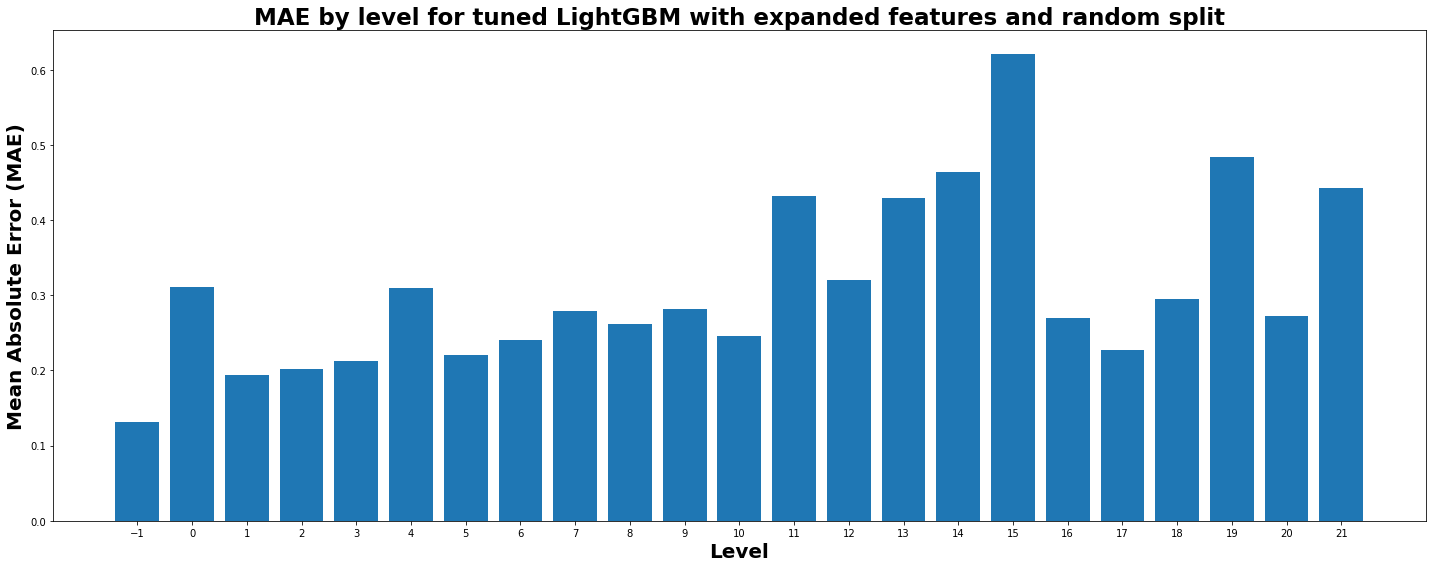

In [45]:
plot_mae_by_level(
    y_test_random_split,
    y_pred_test,
    title="MAE by level for tuned LightGBM with expanded features and random split",
)

In [48]:
predict = lgb_tuned.predict(X_test)
evaluate_round_predictions([0.5, 0.33, 0.45], y_test, predict)

Default:
RMSE: 0.24

Round type: 0.5
RMSE: 0.26

Round type: 0.33
RMSE: 0.29

Round type: 0.45
RMSE: 0.26



In [49]:
predict[predict < -1] = -1
predict[predict > 21] = 21

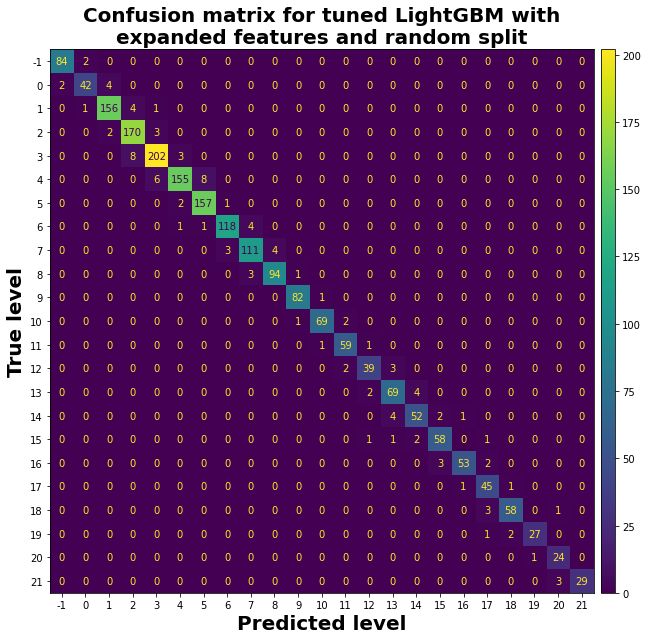

In [50]:
plot_confusion_matrix(
    predict,
    y_test,
    title="Confusion matrix for tuned LightGBM with\nexpanded features and random split",
)

## Summary

In [51]:
results

,Split type,Tuning type,Set of features,RMSE,MAE
0,chronological,default,expanded,0.614277,0.376859
1,chronological,Optuna,expanded,0.564866,0.364123
2,random,default,expanded,0.416749,0.277924
3,random,Optuna,expanded,0.429902,0.282118


In [52]:
from training.results import plot_summary

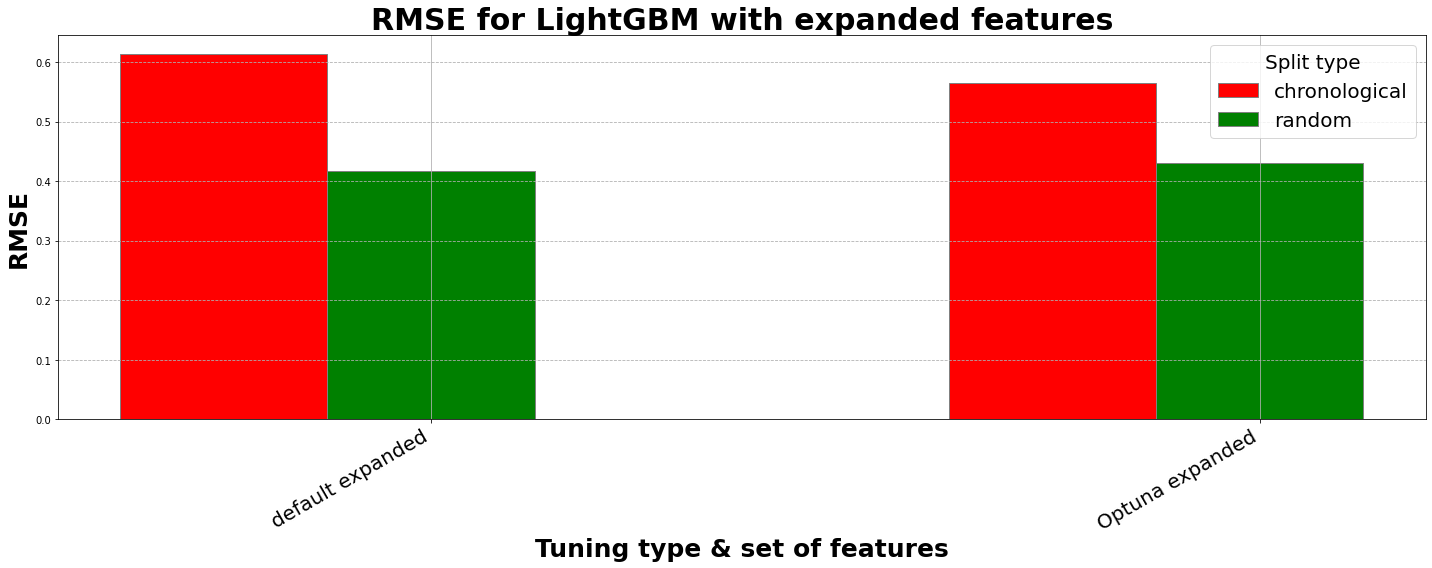

In [53]:
plot_summary(results, "RMSE", title="RMSE for LightGBM with expanded features")

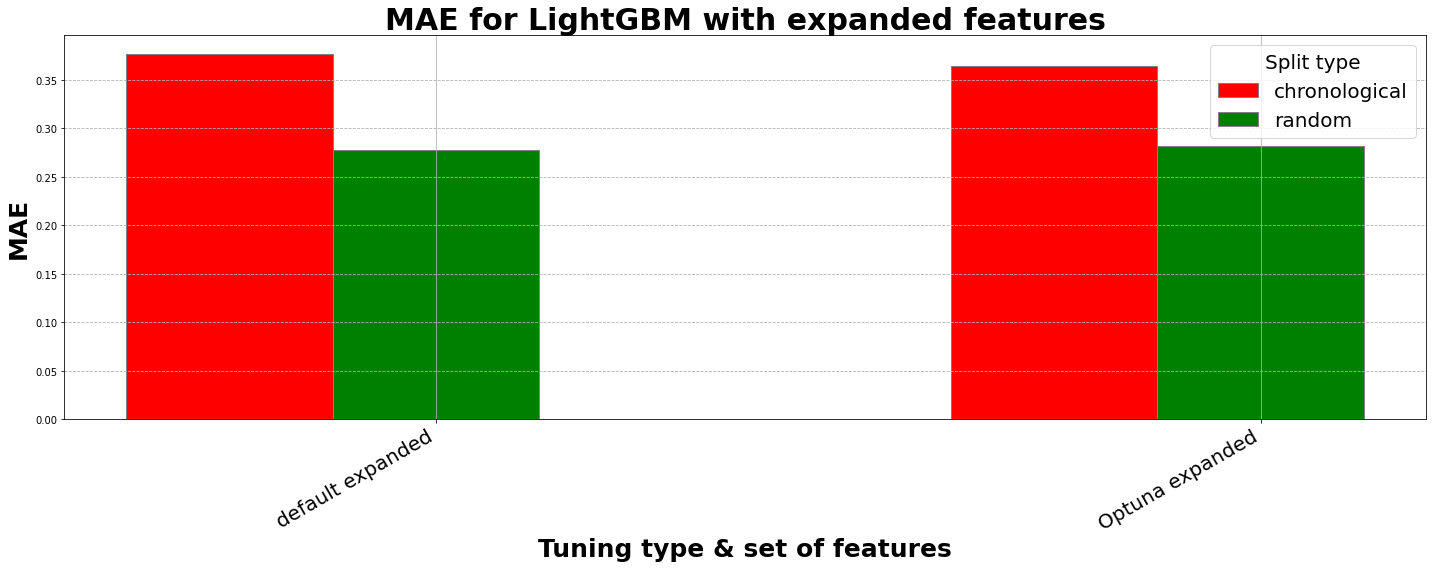

In [54]:
plot_summary(results, "MAE", title="MAE for LightGBM with expanded features")

In [55]:
results.to_csv("./lightgbm_expanded_results.csv")